In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [115]:
print(train.shape)
print(train.columns)

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [116]:
#numerical features(including literal grades columns)
num_feats = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
             'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 
             'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
             'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
             'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
             'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
             'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
             'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
             'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal',
             'YrSold','SalePrice']

In [117]:
#convert literal grades to a numerical scale
grades = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
          'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
grade_data = train[grades]
grade_data.head()


,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,7,5,Gd,TA,Gd,TA,Ex,Gd,NaN,TA,TA,NaN
1,6,8,TA,TA,Gd,TA,Ex,TA,TA,TA,TA,NaN
2,7,5,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,NaN
3,7,5,TA,TA,TA,Gd,Gd,Gd,Gd,TA,TA,NaN
4,8,5,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,NaN


In [118]:
#refer zip() at https://www.w3schools.com/python/ref_func_zip.asp
literal = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
num = [9, 7, 5, 3, 2]
G = dict(zip(literal, num))

grade_data = grade_data.replace(G)
grade_data.head()

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,7,5,7,5,7.0,5.0,9,7,NaN,5.0,5.0,NaN
1,6,8,5,5,7.0,5.0,9,5,5.0,5.0,5.0,NaN
2,7,5,7,5,7.0,5.0,9,7,5.0,5.0,5.0,NaN
3,7,5,5,5,5.0,7.0,7,7,7.0,5.0,5.0,NaN
4,8,5,7,5,7.0,5.0,9,7,5.0,5.0,5.0,NaN


In [1]:
train[grades] = train[grades].replace(G)

NameError: name 'train' is not defined

In [2]:
# Categorical features: everything that is not 'numerical'
cat_feats = train.drop(num_feats, axis=1).columns
cat_feats

NameError: name 'train' is not defined

In [3]:
# Delete categorical features
train.drop(cat_feats,axis=1,inplace=True)

NameError: name 'train' is not defined

In [4]:
#check NAs
train.isnull().sum()[train.isnull().sum() > 0]

NameError: name 'train' is not defined

In [5]:
#Delete features that has many NAs
train.drop(['LotFrontage','FireplaceQu','PoolQC']
           ,axis=1,inplace=True)

NameError: name 'train' is not defined

In [124]:
#Delete rows with NAs
train.dropna(axis=0,how='any',inplace=True)
print(train.shape)

(1341, 42)


In [125]:
#EDA 1: correlation coefficient - Top 7 features
print("correlation coef. with SalePrice")
c = train.corr().round(3)['SalePrice']
c = np.abs(c)
print(c.sort_values(ascending=False)[1:8])

correlation coef. with SalePrice
OverallQual    0.784
GrLivArea      0.711
ExterQual      0.670
KitchenQual    0.650
BsmtQual       0.643
GarageCars     0.641
GarageArea     0.608
Name: SalePrice, dtype: float64


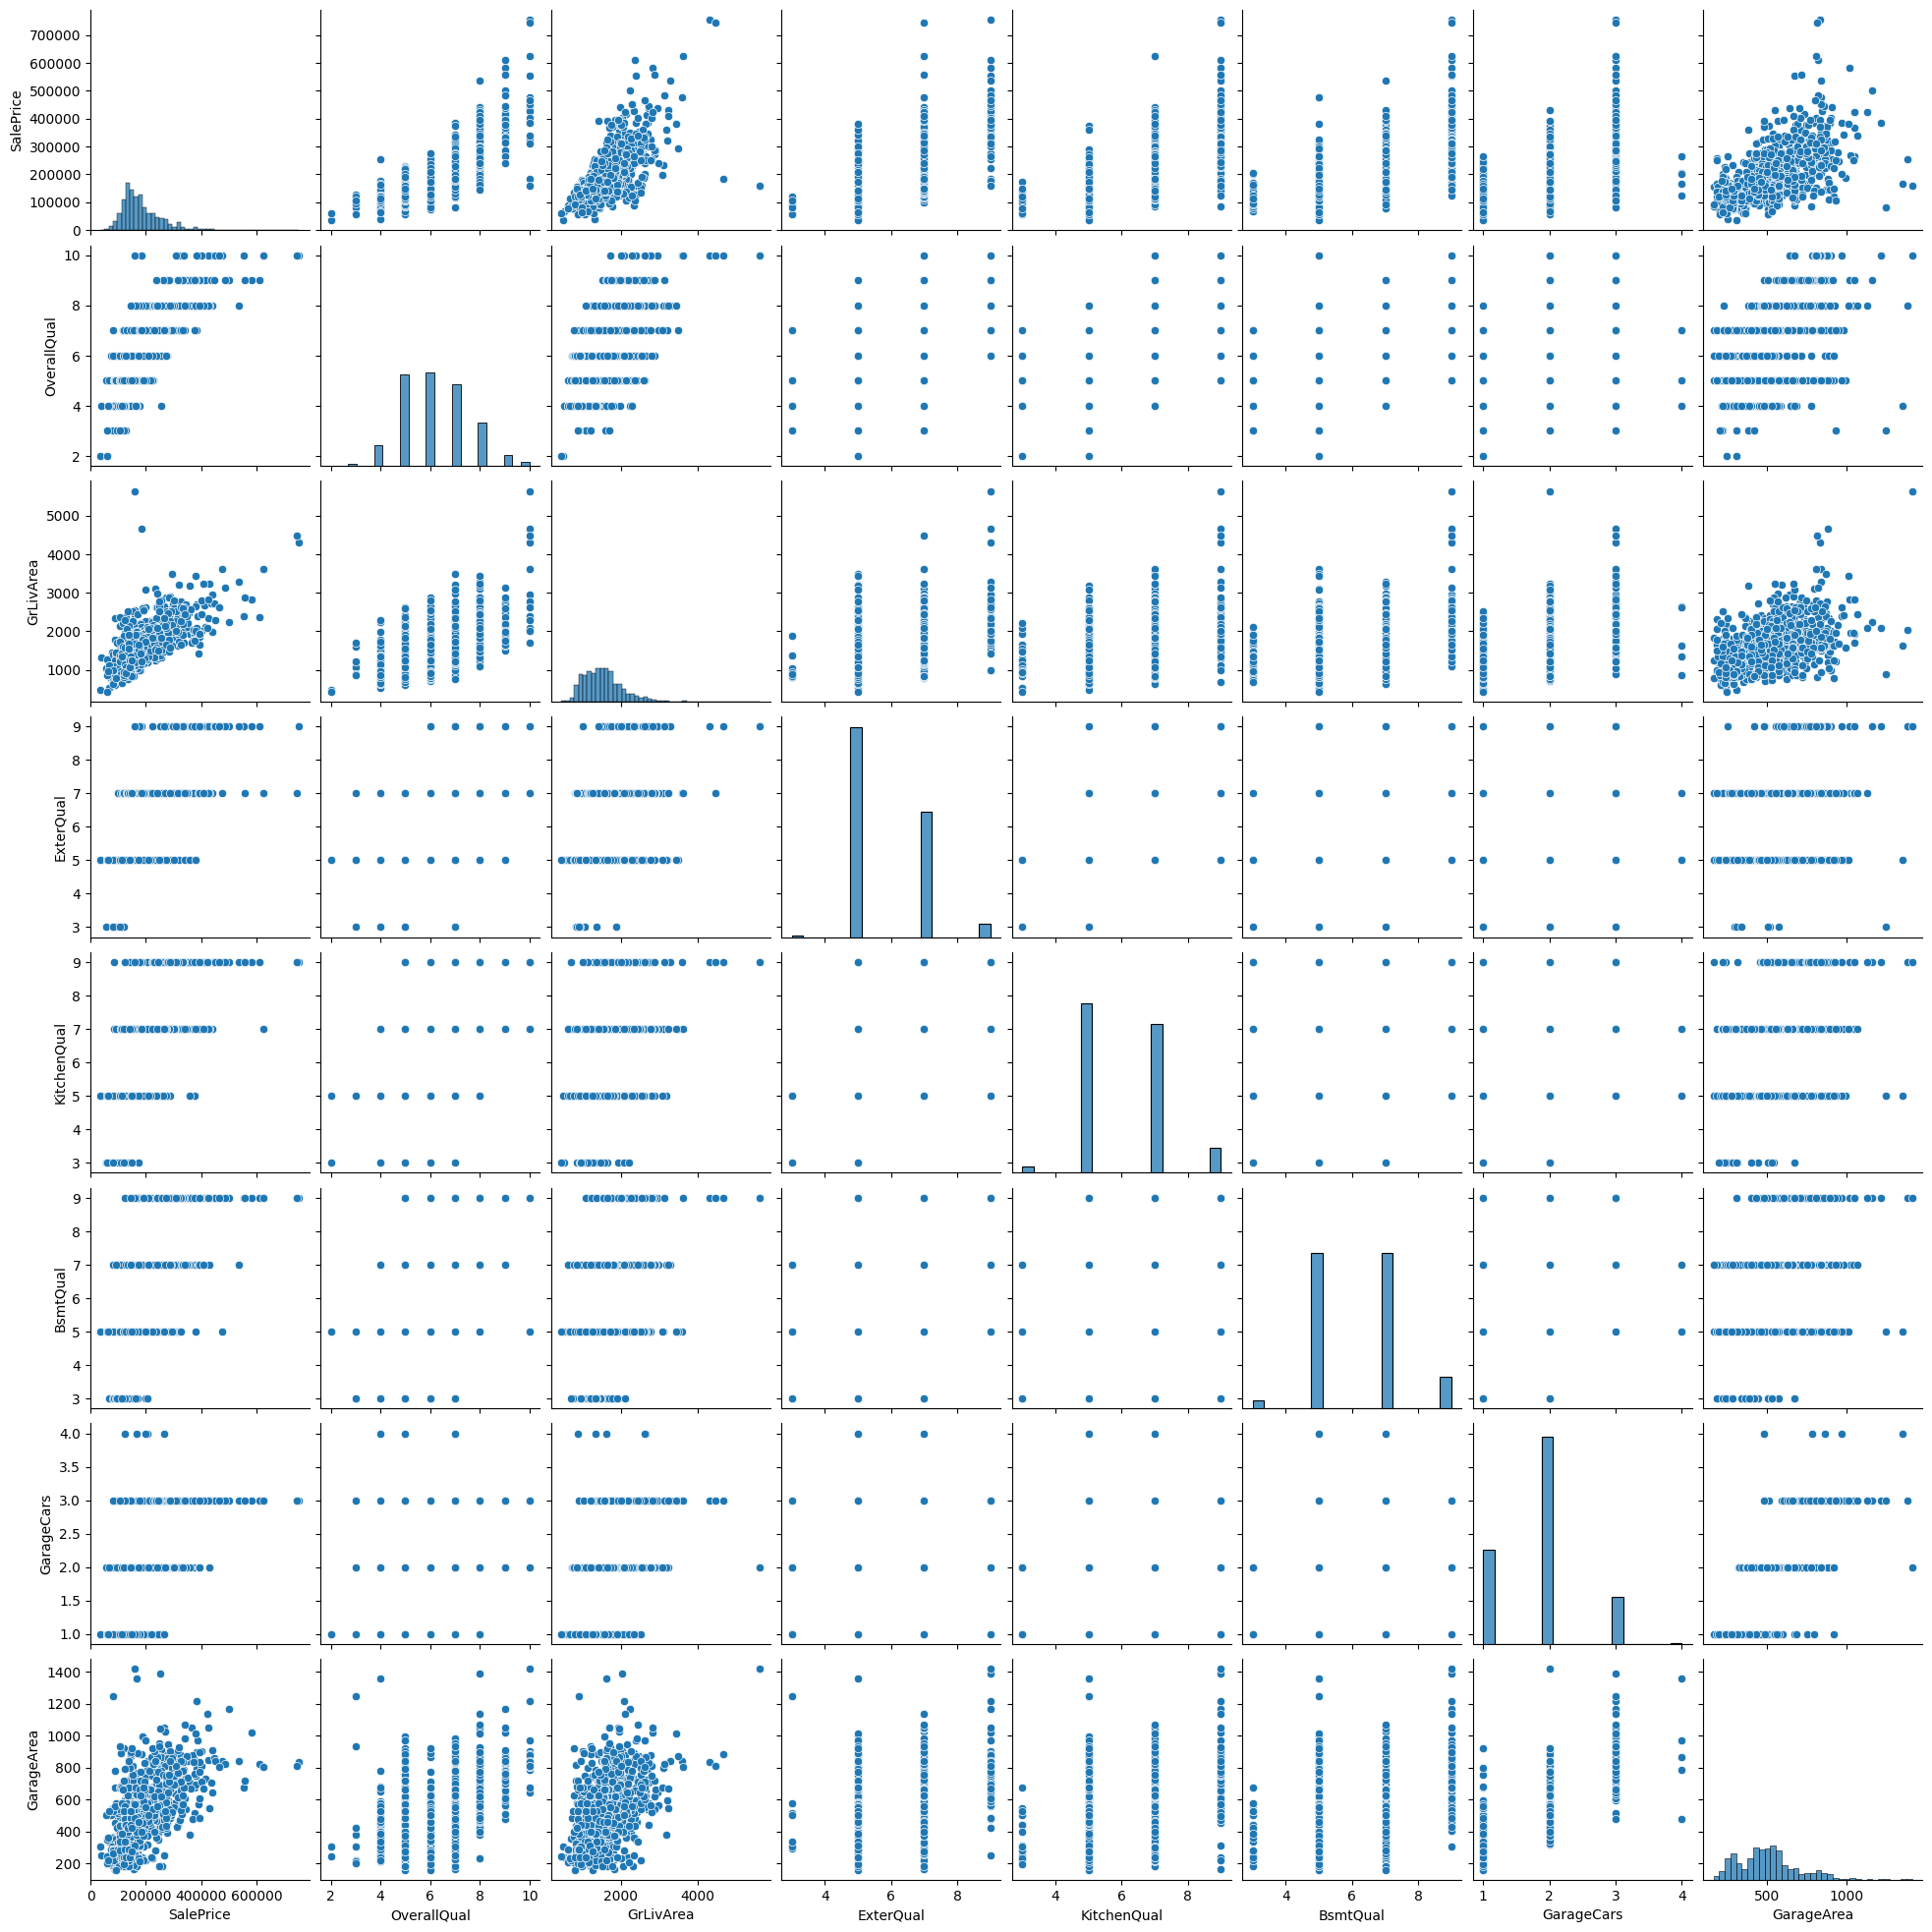

In [131]:
#EDA 2: pairplot of Top 7 features with SalePrice
selected_feat = ['SalePrice','OverallQual','GrLivArea','ExterQual','KitchenQual','BsmtQual',
                 'GarageCars','GarageArea']
sns.pairplot(train[selected_feat])
#첫 열은 house price이고 나머지는 top 7?6? 데이터이다.

In [132]:
#split independent / dependent variables
X = train[selected_feat[1:]]
y = train[selected_feat[0]]

In [136]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

regr = LinearRegression()
regr.fit(X_train,y_train)
print("evaluation result is ",regr.score(X_test,y_test).round(3))

evaluation result is  0.811


,OverallQual,GrLivArea,ExterQual,KitchenQual,BsmtQual,GarageCars,GarageArea
0,7,1710,7,7,7.0,2,548
1,6,1262,5,5,7.0,2,460
2,7,1786,7,7,7.0,2,608
3,7,1717,5,7,5.0,3,642
4,8,2198,7,7,7.0,3,836
